<a href="https://colab.research.google.com/github/harlock-42/pro_piscine_AI/blob/main/Advanced01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [68]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
# Read the data from the CSV file using Pandas
train_df = pd.read_csv("train.csv")

In [6]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

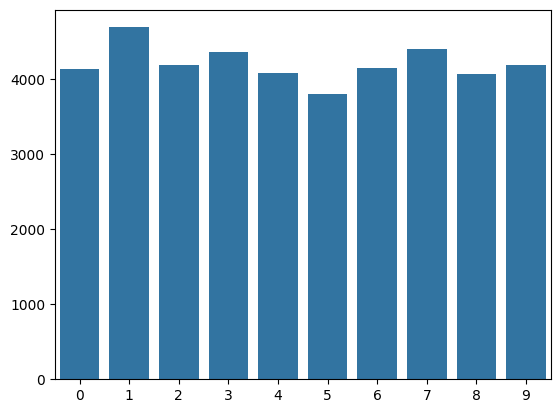

In [27]:
# Get the label counts from the DataFrame
label = train_df['label']

# Create a bar chart using Seaborn
label_count = np.array([label.value_counts().get(i, 0) for i in range(10)])
sns.barplot(x = [str(i) for i in range(10)],
            y = label_count)

In [64]:
def image_show(df, row_number, visualize=False, test_df=False):
    '''
        Parameters:
            df --> Pandas dataframe type
            row_number --> row index (For example: 0, 1, 2, 3, etc.)
             visualize --> If True then displays the raw data into 28 by 28 pixels image.
                          If False then returns '28 by 28 pixels reshaped image data' and 'corresponding label'
    '''
    plt.imshow(df.iloc[row_number].values[1:].reshape(28, 28), cmap="gray")
    plt.show()

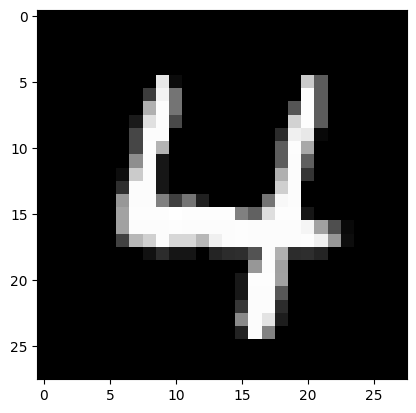

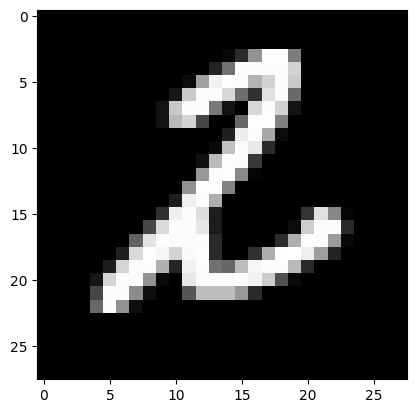

In [66]:
image_show(train_df, 42, visualize=True)
image_show(train_df, 4242, visualize=True)

In [101]:
def dataframe_formatter(df, isTest=False):
    """
    Formats a DataFrame containing image data for use in a machine learning model.

    :param df: The DataFrame containing image data.
    :param isTest: A boolean indicating whether the DataFrame is for testing data.
    :return: A tuple containing X (image data) and y (labels).
    """
    y = df.drop("label", axis='columns').values
    y = y.reshape(y.shape[0], 28, 28)
    if isTest == False:
      x = df['label'].values
      return y, label
    return y, None

    # return train_test_split(df.values, test_size=0.8)

In [102]:
X_train, y_train = dataframe_formatter(train_df, isTest=False)

In [103]:
# Split the data into a train and validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [ ]:
# Create a CNN with Keras from TensorFlow
# Your inputs should have the same size as your images (same as in the reshape function above)

model = models.Sequential(  # Create the model with layers sequentially
    [
        ...,  # 2D convolutional layer with 20 filters, each 3x3, using ReLU activation, input shape is 28x28x1 (image dimensions)
        ...,  # Max-pooling layer with a 2x2 window to reduce image size
        ...,  # 2D convolutional layer with 32 filters, each 3x3, using ReLU activation
        ...,  # Max-pooling layer with a 2x2 window
        ...,  # 2D convolutional layer with 32 filters, each 2x2, using ReLU activation
        ...,  # Max-pooling layer with a 2x2 window
        ...,  # Flatten layer to convert the 2D output to 1D
        ...,  # Fully connected layer with 200 neurons and ReLU activation
        ...,  # Dropout layer with a dropout rate of 0.2 for regularization to prevent overfitting
        ...  # Fully connected layer with 10 output units (classes) and sigmoid activation
    ]
)
model.summary()  # Summary of the model to verify its structure

In [ ]:
# Compile the model
# We specify the optimizer 'adam', which is a popular and efficient stochastic optimizer for neural networks.
# We use the loss function 'sparse_categorical_crossentropy', commonly used for multi-class classification with discrete labels.
# We also specify that we want to track the 'accuracy' metric during training.

model.compile(...)

In [ ]:
# Early stopping in case of 3 consecutive bad epochs (if we're not learning effectively and there's a risk of overfitting)
stop_training = ...

In [ ]:
# Train the model with 20 epochs
model.fit(...)

Epoch 1/20
1050/1050 [==============================] - 8s 5ms/step - loss: 0.3161 - accuracy: 0.9012 - val_loss: 0.1081 - val_accuracy: 0.9657
Epoch 2/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0975 - accuracy: 0.9692 - val_loss: 0.0786 - val_accuracy: 0.9754
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0687 - accuracy: 0.9781 - val_loss: 0.0564 - val_accuracy: 0.9813
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss: 0.0599 - val_accuracy: 0.9812
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0455 - accuracy: 0.9851 - val_loss: 0.0542 - val_accuracy: 0.9824
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0525 - val_accuracy: 0.9844
Epoch 7/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0326 - accuracy: 0.9892 - val_loss: 0.0483 - val_accuracy:

In [ ]:
# Read the data from the CSV file using Pandas
test_df = ...("test.csv")

In [ ]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = dataframe_formatter(test_df, isTest=True)

In [ ]:
predictions = model.predict(X_test)

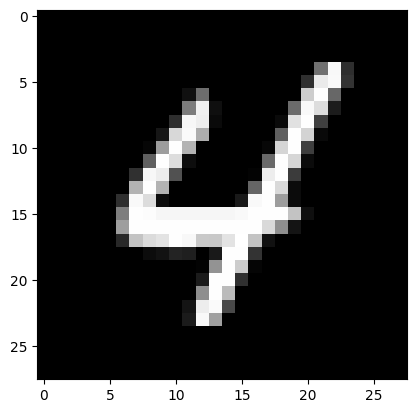

[1.7829868e-06 1.7190318e-03 3.4872707e-04 2.6758605e-07 1.0000000e+00
 3.7293514e-04 7.8208819e-03 2.2594722e-03 1.5026551e-02 1.0492728e-01]


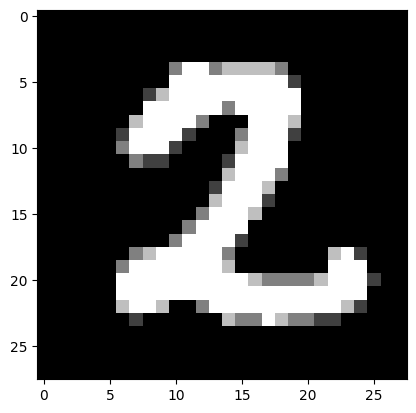

[2.97596455e-02 9.95992348e-02 9.99998331e-01 8.95828567e-03
 2.32506965e-04 6.70029010e-08 1.33382155e-05 6.25115037e-02
 3.57535668e-02 2.83353875e-05]


In [ ]:
image_show(test_df, 42, visualize=True, test_df=True)
print(predictions[42])
image_show(test_df, 4242, visualize=True, test_df=True)
print(predictions[4242])